![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/logo_MCV_W.png)

# **Add and Remove Noise and Fix Contrast with Histogram Equalization**

####**In this lesson we'll learn:**
1. How to add white noise or film grain effects to images
2. How to implement Histogram Equalization

### **What is Noise?**

![](https://2.bp.blogspot.com/-b-hwrNlSs4Y/V6IKh7NamaI/AAAAAAAAOB4/rJ7oPYVKZgg2Py9eA7pR62Lbn1yNJjnvwCLcB/s1600/ISO-Noise.jpg)

Digital Camera sensors can take pictures in low light environments by increasing the sensativity of the camera sensor (CCD). However, this increase in sensativity (ISO increase) comes with a price. The price is noise. Noise arises because the higher sensativity of the sensor makes it susceptible to random noise. This is because the in low light scenes there isn't much variation between the scene and random photon noise. 

https://blog.michaeldanielho.com/2016/08/understanding-cameras-exposure-setting.html

In [ ]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/soaps.jpeg

Downloading...
From: https://drive.google.com/uc?id=1O2uCujErifjvK1ziRGssaQO9khI15g6q
To: /content/images.zip
100% 29.6M/29.6M [00:00<00:00, 94.0MB/s]
--2021-11-21 15:50:10--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/soaps.jpeg
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/soaps.jpeg [following]
--2021-11-21 15:50:10--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/soaps.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57418 (56K) [image/jpeg]
Saving to: ‘soaps.jpeg’

soaps.jpeg          100%[========

## **Adding Film Grain or Noise to Images**

In [ ]:
def addWhiteNoise(image):
    # Set the range for a random probablity
    # A large prob will mean more noise
    prob = random.uniform(0.05, 0.1)

    # Generate a random matrix in the shape of our input image
    rnd = np.random.rand(image.shape[0], image.shape[1])

    # If the random values in our rnd matrix are less than our random probability
    # We randomly change that pixel in our input image to a value within the range specified
    image[rnd < prob] = np.random.randint(50,230)
    return image

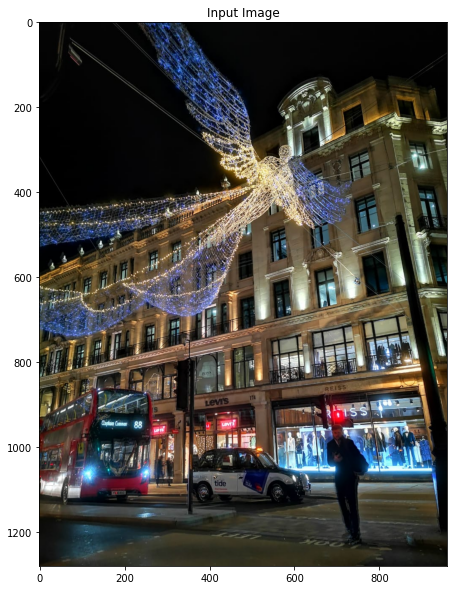

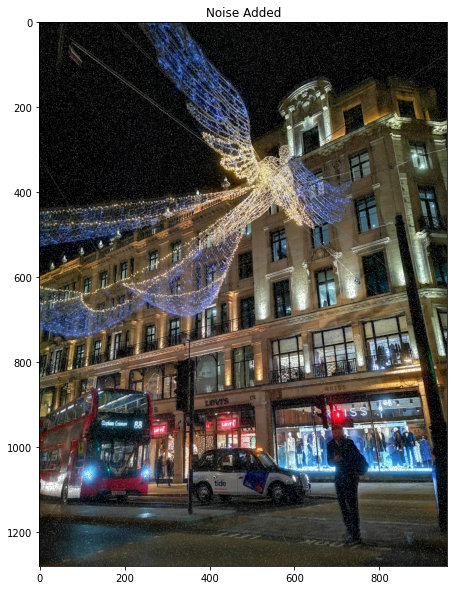

In [ ]:
# Load our image
image = cv2.imread('images/londonxmas.jpeg')
imshow("Input Image", image)

# Apply our white noise function to our input image 
noise_1 = addWhiteNoise(image)
imshow("Noise Added", noise_1)

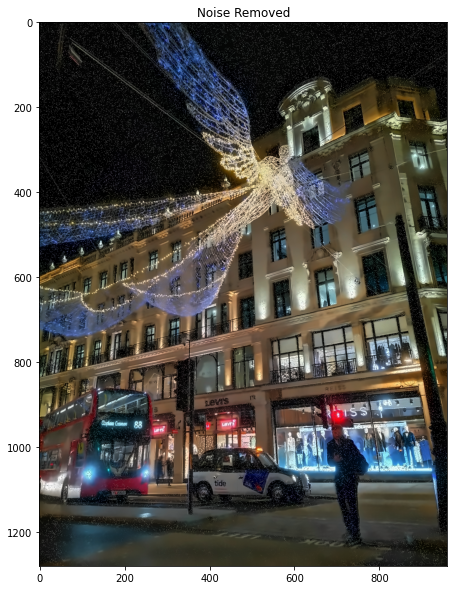

In [ ]:
# cv2.fastNlMeansDenoisingColored(input, None, h, hForColorComponents, templateWindowSize, searchWindowSize)
# None are - the filter strength 'h' (5-12 is a good range)
# Next is hForColorComponents, set as same value as h again
# templateWindowSize (odd numbers only) rec. 7
# searchWindowSize (odd numbers only) rec. 21

dst = cv2.fastNlMeansDenoisingColored(noise_1, None, 11, 6, 7, 21)

imshow("Noise Removed", dst)

**There are 4 variations of Non-Local Means Denoising:**

- cv2.fastNlMeansDenoising() - works with a single grayscale images
- cv2.fastNlMeansDenoisingColored() - works with a color image.
- cv2.fastNlMeansDenoisingMulti() - works with image sequence captured in short period of time (grayscale images)
- cv2.fastNlMeansDenoisingColoredMulti() - same as above, but for color images.

### **Using Histogram Qualization** 

![](https://docs.opencv.org/master/histogram_equalization.png)

This 'adjusts' the dynamic range of an image, making it spread more evenly accorss the intensity distribution, and thus improving contrast.

#### **First, let's take a look at the Histogram of our Input Image**

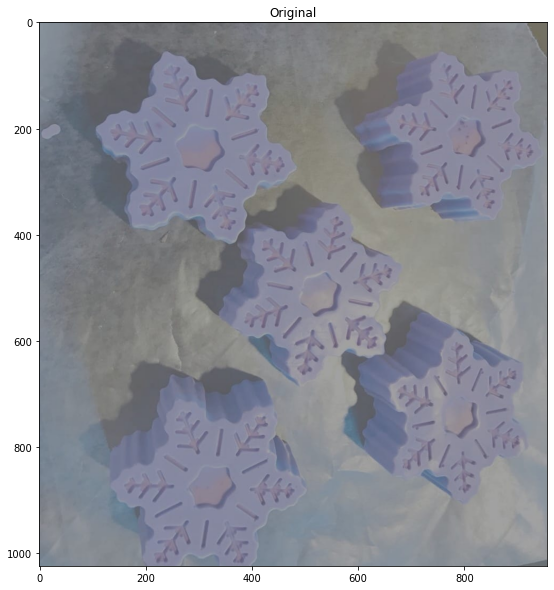

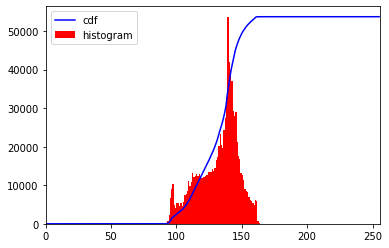

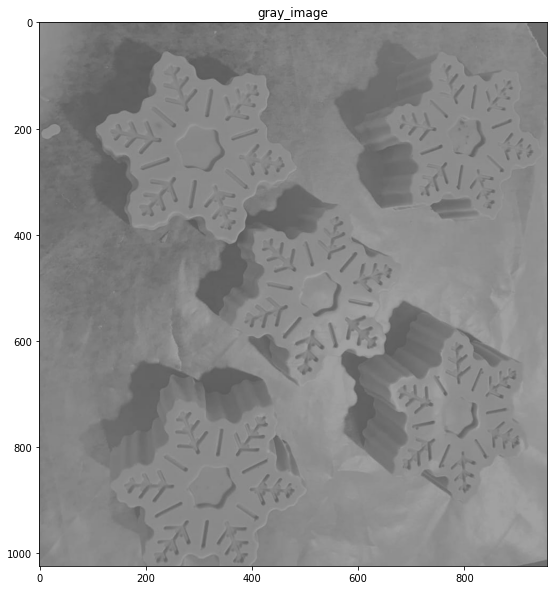

In [ ]:
# Load our image
img = cv2.imread('soaps.jpeg')
imshow("Original", img)

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create our histogram distribution
hist,bins = np.histogram(gray_image.flatten(),256,[0,256])

# Get the Cumulative Sum 
cdf = hist.cumsum()

# Get a normalize cumulative distribution
cdf_normalized = cdf * float(hist.max()) / cdf.max()

# Plot our CDF overlaid onto our Histogram
plt.plot(cdf_normalized, color = 'b')
plt.hist(gray_image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
imshow("gray_image", gray_image)


#### **Now, let's apply Histogram Equalization**

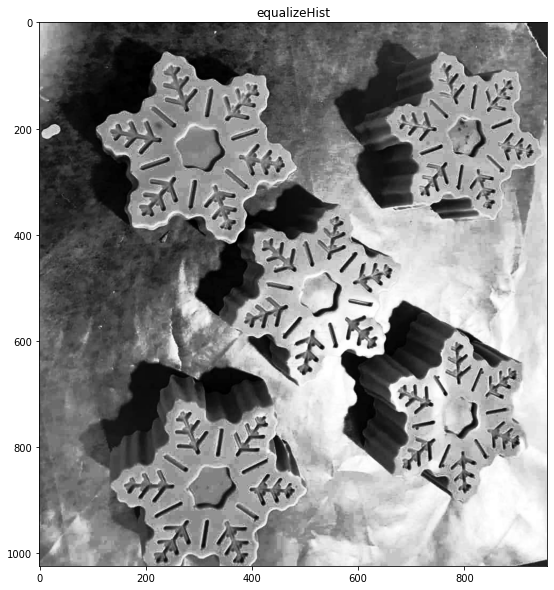

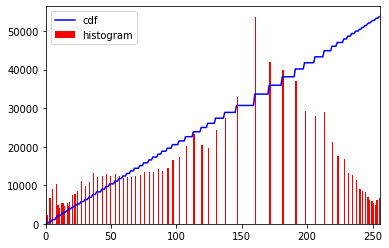

In [ ]:
img = cv2.imread('soaps.jpeg')

# Convert to grayscale
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Equalize our Histogram
gray_image = cv2.equalizeHist(gray_image)
imshow("equalizeHist", gray_image)

# Create our histogram distribution
hist,bins = np.histogram(gray_image.flatten(),256,[0,256])

# Get the Cumulative Sum 
cdf = hist.cumsum()

# Get a normalize cumulative distribution
cdf_normalized = cdf * float(hist.max()) / cdf.max()

# Plot our CDF overlaid onto our Histogram
plt.plot(cdf_normalized, color = 'b')
plt.hist(gray_image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

### **Excerise:**
1. Equlize all RGB (BGR) channels of this image and then merge them together to obtain an equlized color image.